In [1]:
import pandas as pd
data = pd.read_csv('CleanedData.csv')
print(data)



                    Date     Open     High      Low    Close  Change(Pips)  \
0    2021-07-04 00:00:00  1787.22  1787.73  1785.00  1786.39           -83   
1    2021-07-05 00:00:00  1786.68  1794.00  1783.80  1791.15           447   
2    2021-07-06 00:00:00  1790.85  1814.89  1789.89  1795.68           483   
3    2021-07-07 00:00:00  1795.28  1809.50  1793.41  1803.22           794   
4    2021-07-08 00:00:00  1803.29  1818.00  1793.90  1803.75            46   
..                   ...      ...      ...      ...      ...           ...   
617  2023-06-29 00:00:00  1909.47  1913.00  1893.16  1908.76           -71   
618  2023-06-30 00:00:00  1908.71  1922.61  1900.57  1919.20          1049   
619  2023-07-02 00:00:00  1920.30  1920.30  1917.50  1917.70          -260   
620  2023-07-03 00:00:00  1917.70  1930.50  1910.11  1921.17           347   
621  2023-07-04 00:00:00  1921.07  1930.22  1920.34  1929.65           858   

     Change(%)  
0        -0.05  
1         0.25  
2         0.

In [2]:
dataset=pd.read_csv('CleanedData.csv').values
low_value=dataset[:,3]
print(low_value[:5])

low_value=low_value.reshape(-1,1) #convering into a column vector
print(low_value[:5])

print(low_value.shape)

[1785.0 1783.8 1789.89 1793.41 1793.9]
[[1785.0]
 [1783.8]
 [1789.89]
 [1793.41]
 [1793.9]]
(622, 1)


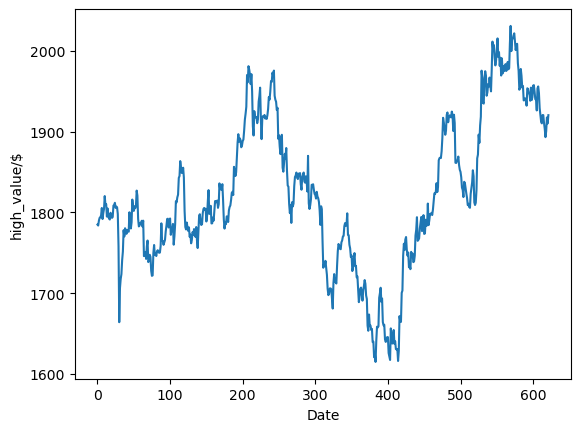

In [3]:
from matplotlib import pyplot as plt

plt.plot(low_value)
plt.xlabel('Date')
plt.ylabel('high_value/$')
plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler

scalerL=MinMaxScaler(feature_range=(0,1))
scaled_low_value=scalerL.fit_transform(low_value)

print(low_value[:5])
print(scaled_low_value[:5])

[[1785.0]
 [1783.8]
 [1789.89]
 [1793.41]
 [1793.9]]
[[0.40882303]
 [0.40593655]
 [0.42058548]
 [0.42905251]
 [0.43023116]]


In [6]:
data=[]
target=[]

for i in range(50,low_value.shape[0]):
    data.append(scaled_low_value[i-50:i])
    target.append(scaled_low_value[i])
print(data[0])
print(target[0])


[[0.40882303]
 [0.40593655]
 [0.42058548]
 [0.42905251]
 [0.43023116]
 [0.43655738]
 [0.45813388]
 [0.42527602]
 [0.44295576]
 [0.45505496]
 [0.49358959]
 [0.46729849]
 [0.46967984]
 [0.43263657]
 [0.45654632]
 [0.43186684]
 [0.42688764]
 [0.42378467]
 [0.44394198]
 [0.43480143]
 [0.42876386]
 [0.4313617 ]
 [0.46527794]
 [0.46631227]
 [0.47355255]
 [0.45837443]
 [0.46234335]
 [0.46032281]
 [0.44016549]
 [0.34459866]
 [0.11824983]
 [0.21992639]
 [0.24703534]
 [0.26137156]
 [0.30298511]
 [0.32824189]
 [0.39198518]
 [0.37346355]
 [0.39790248]
 [0.39063815]
 [0.3811849 ]
 [0.39294735]
 [0.38982032]
 [0.38741491]
 [0.44536117]
 [0.40514276]
 [0.39708465]
 [0.41558223]
 [0.48317418]
 [0.46198254]]
[0.44947442]


In [7]:
print(target[0])

[0.44947442]


In [8]:
import numpy as np

data_np=np.array(data)
target_np=np.array(target)

print(data_np.shape)
print(target_np.shape)

(572, 50, 1)
(572, 1)


In [11]:
np.save('dataL',data)
np.save('targetL',target)

In [12]:
import joblib
joblib.dump(scalerL, 'stock-scalerL.sav') 

['stock-scalerL.sav']

In [13]:
import numpy as np

data=np.load('dataL.npy')
target=np.load('targetL.npy')

In [14]:
train_data=data[:472]
train_target=target[:472]

test_data=data[472:]
test_target=target[472:]

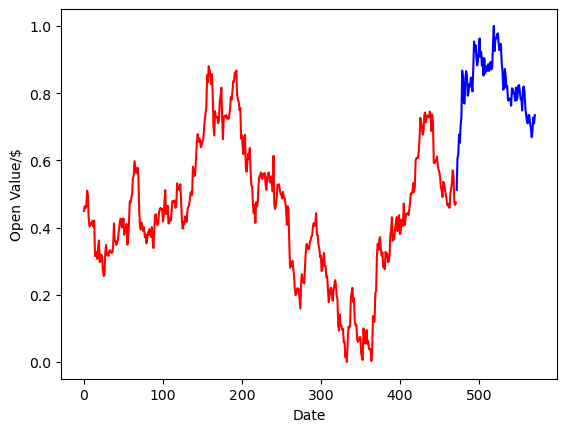

In [15]:
from matplotlib import pyplot as plt

test_x_range=np.arange(472,572,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [16]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

model=Sequential()

model.add(LSTM(units=96,return_sequences=True,input_shape=(data.shape[1:])))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='linear'))

model.compile(loss='mse',optimizer='adam')

In [31]:
history=model.fit(train_data,train_target,epochs=20,validation_split=0.1)

Epoch 1/20
14/14 [==============================] - 15s 292ms/step - loss: 0.0018 - val_loss: 9.7728e-04
Epoch 2/20
14/14 [==============================] - 3s 184ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 3/20
14/14 [==============================] - 3s 191ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 4/20
14/14 [==============================] - 3s 184ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 5/20
14/14 [==============================] - 3s 184ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 6/20
14/14 [==============================] - 3s 184ms/step - loss: 0.0018 - val_loss: 9.8204e-04
Epoch 7/20
14/14 [==============================] - 3s 185ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 8/20
14/14 [==============================] - 3s 187ms/step - loss: 0.0018 - val_loss: 9.7945e-04
Epoch 9/20
14/14 [==============================] - 3s 185ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 10/20
14/14 [==============================] - 3s 185ms/step - loss: 0.0018 - val

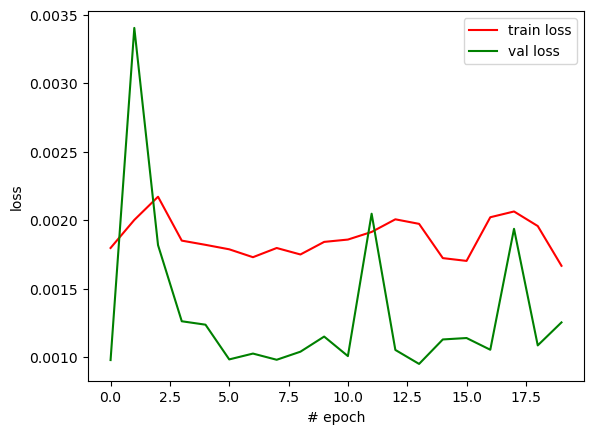

In [32]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [33]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score:',r2)

4/4 [==============================] - 2s 64ms/step
r2 score: 0.8422124745251808


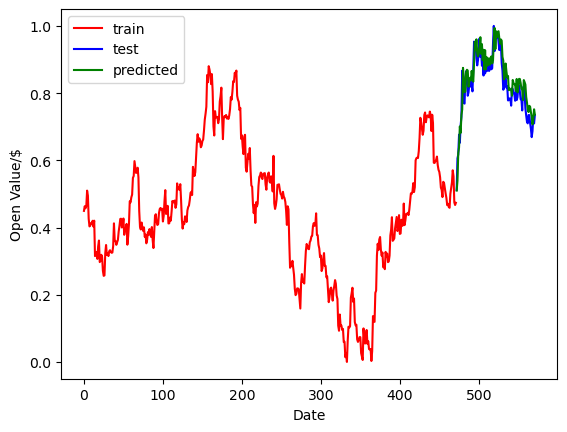

In [34]:
test_x_range=np.arange(472,572,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result+0.02,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

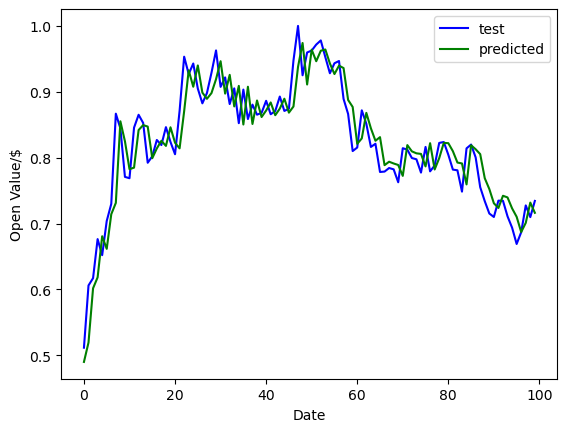

In [35]:
plt.plot(test_target,'b',label='test')
plt.plot(result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

In [36]:
model.save('LSTM-Stock-Market-Low.model')

TypeError: Binding inputs to tf.function failed due to `missing a required argument: 'inputs'`. Received args: ([TensorSpec(shape=(None, None, 1), dtype=tf.float32, name=None)],) and kwargs: {'training': True} for signature: (self, inputs, mask=<captured_default_value>, training=<captured_default_value>, initial_state=<captured_default_value>).

In [25]:
from keras.models import load_model

model=load_model('LSTM-Stock-Market-Low.model')

In [26]:
import joblib
scaler=joblib.load('stock-scalerL.sav')

In [79]:
import numpy as np

test_data=np.array([1829.30,1834.97,1864.15,1865.65,1877.22,1885.30,1933.76,1933.76,1931.8,1931.56,1962.74,1977.86,1997.27,1983.4,1980.99,1987.19,1994.05,2009.48,2007.37,2007.8,1992.09,1991.49,2004.06,1993.3,1978.75,1971.12,1965.69,1960.93,1949.27,1970.84,1975.59,1988.03,1993.94,1985.26,2007.52,2006.52,1999.19,2003.68,2018.14,2043.00,2052.09,2047.59,2075.34,2135.72,2041.33,2036.30,2039.93,2034.19,2008.72,1996.59]).reshape(-1,1)

print(test_data.shape)
print(test_data)


(50, 1)
[[1829.3 ]
 [1834.97]
 [1864.15]
 [1865.65]
 [1877.22]
 [1885.3 ]
 [1933.76]
 [1933.76]
 [1931.8 ]
 [1931.56]
 [1962.74]
 [1977.86]
 [1997.27]
 [1983.4 ]
 [1980.99]
 [1987.19]
 [1994.05]
 [2009.48]
 [2007.37]
 [2007.8 ]
 [1992.09]
 [1991.49]
 [2004.06]
 [1993.3 ]
 [1978.75]
 [1971.12]
 [1965.69]
 [1960.93]
 [1949.27]
 [1970.84]
 [1975.59]
 [1988.03]
 [1993.94]
 [1985.26]
 [2007.52]
 [2006.52]
 [1999.19]
 [2003.68]
 [2018.14]
 [2043.  ]
 [2052.09]
 [2047.59]
 [2075.34]
 [2135.72]
 [2041.33]
 [2036.3 ]
 [2039.93]
 [2034.19]
 [2008.72]
 [1996.59]]


In [80]:
test_data=scaler.transform(test_data)
print(test_data)

[[0.43789483]
 [0.45106373]
 [0.51883593]
 [0.52231977]
 [0.54919175]
 [0.56795801]
 [0.6805091 ]
 [0.6805091 ]
 [0.67595689]
 [0.67539948]
 [0.7478168 ]
 [0.78293385]
 [0.82801468]
 [0.79580082]
 [0.79020346]
 [0.80460331]
 [0.82053605]
 [0.8563731 ]
 [0.8514725 ]
 [0.8524712 ]
 [0.81598384]
 [0.8145903 ]
 [0.84378484]
 [0.81879413]
 [0.78500093]
 [0.76727982]
 [0.75466834]
 [0.74361297]
 [0.71653196]
 [0.76662951]
 [0.77766165]
 [0.80655425]
 [0.82028056]
 [0.80012077]
 [0.85182088]
 [0.84949833]
 [0.83247399]
 [0.84290227]
 [0.87648644]
 [0.9342252 ]
 [0.95533724]
 [0.94488573]
 [1.00933668]
 [1.14957265]
 [0.93034653]
 [0.91866407]
 [0.92709495]
 [0.91376347]
 [0.85460795]
 [0.82643534]]


In [81]:
test_data=test_data.reshape((1,50,1))
print(test_data.shape)

result=model.predict(test_data)




(1, 50, 1)
1/1 [==============================] - 0s 66ms/step


In [82]:
print(result)
print(result.shape)

[[0.8161006]]
(1, 1)


In [83]:
transformed_result=scaler.inverse_transform(result)
print(transformed_result[0][0])

1992.1403
